Q1

Ans: There would be n*m*k multiplications and there would be n*m*(k-1) additions, to perform a matrix multiplication between a (n, k) and (k, m) matrix. There has to be m*k and m*(k-1) mulitplications for 1 row, so when we assume there are n rows we can simply multiply with n and that results n*m*k and n*m*(k-1) as mulitplications and addtions respectively.

Q2

In [1]:
import numpy as np
import random
import time
# (n,k) and (k,m) arrays


def Multiplication_lists(loli_1:list, loli_2:list, n, m):
    start_time:time = time.time()
    mul_ans = [[0 for i in range(m)]for j in range(n)]
    for i in range(n):
        for j in range(m):
            temp = 0
            for p in range(k):
                temp += loli_1[i][p]*loli_2[p][j]
            mul_ans[i][j] = temp
    end_time:time = time.time()
    li_time:time = end_time - start_time
    return li_time

def Multiplication_np(np_array_1:np.ndarray, np_array_2:np.ndarray, n, m):
    np_start_time:time = time.time()
    np_mul_ans = np.matmul(np_array_1, np_array_2)
    np_end_time:time = time.time()
    np_time:time = np_end_time - np_start_time
    return np_time


n, k, m = 100, 300, 100 
li_temp:time = 0
np_temp:time = 0
for i in range(100):
    loli_1 = [[random.randint(1,100) for i in range(k)]for j in range(n)]
    loli_2 = [[random.randint(1,100) for i in range(m)]for j in range(k)]
    np_array_1 = np.array(loli_1)
    np_array_2 = np.array(loli_2)
    
    li_temp = Multiplication_lists(loli_1, loli_2, n, m)
    np_temp = Multiplication_np(np_array_1, np_array_2, n, m)

li_time = li_temp/100
np_time = np_temp/100

print("Time taken for matrix multiplication using numpy: {}".format(np_time))
print("TIme taken for matrix multiplication using lists: {}".format(li_time))

Time taken for matrix multiplication using numpy: 1.6243457794189452e-05
TIme taken for matrix multiplication using lists: 0.002075369358062744


Q3

In [52]:
def find_min(lis:list):
    mini = 1000
    for i in range(len(lis)):
        if(mini>lis[i]):
            mini = lis[i]
            index = i
    return(index, mini)

def finding_the_median_norm(lis_1:list):
    start_time:time = time.time()
    length = len(lis_1)
    lis = lis_1
    count = 0
    ans_1:float = -1
    ans_2:time = -1
    
    if(length%2 != 0):
        while(count <= length//2):
            i, temp = find_min(lis)
            lis[i] = 1000
            count += 1
        ans_1 = temp
            
    elif(length%2 == 0):
        while(count <= length//2):
            i, temp = find_min(lis)
            lis[i] = 1000
            if(count == length//2):
                temp_1:float = temp
            elif(count == (length//2)-1):
                temp_2:float = temp
            count += 1
        ans_1 = (temp_1 + temp_2)/2

    end_time:time = time.time()
    ans_2 = end_time-start_time

    return(ans_1, ans_2)

def finding_the_median_opt(lis:list):
    start_time:time = time.time()
    length = len(lis)
    sorted_lis = sorted(lis)
    ans_1:float = 0
    if(length%2 != 0):
        ans_1 = sorted_lis[length//2]

    if(length%2 == 0):
        ans_1 = (sorted_lis[length//2]+sorted_lis[(length//2)-1])/2
        
    end_time:time = time.time()
    ans_2:time = end_time-start_time
    return (ans_1, ans_2)

def finding_the_median_np(np_array_1:np.ndarray):
    start_time:time = time.time()
    ans_1:float = np.median(np_array_1)
    end_time:time = time.time()
    ans_2:time = end_time-start_time
    return(ans_1, ans_2)

sum_li_opt_time:time = 0
sum_np_time:time = 0print
sum_li_norm_time:time = 0

for i in range(100):
    lis_1 = [random.randint(1,1000) for _ in range(5000)]
    lis_2 = lis_1[:]
    np_1 = np.array(lis_1)

    li_ans_1, li_ans_2 = finding_the_median_norm(lis_1)
    sum_li_norm_time += li_ans_2
    
    li_ans_3, li_ans_4 = finding_the_median_opt(lis_2)
    sum_li_opt_time += li_ans_4
    
    np_ans_1, np_ans_2 = finding_the_median_np(np_1)
    sum_np_time += np_ans_2

li_norm_time = sum_li_norm_time/100
li_opt_time = sum_li_opt_time/100
np_time = sum_np_time/100

print("Time taken for using numpy: {}".format(np_time))
print("TIme taken for using lists using opt: {}".format(li_opt_time))
print("TIme taken for using lists using norm: {}".format(li_norm_time))

Time taken for using numpy: 0.00013214349746704102
TIme taken for using lists using opt: 0.00042563915252685547
TIme taken for using lists using norm: 0.34606448173522947


Q4

The Gradient of (x^2)*y + (y^3)*sin(x) with respect to x = 2x*y + (y^3)*cos(x)

The Gradient of (x^2)*y + (y^3)*sin(x) with respect to y = x^2 + (3y^2)*sin(x)

Q5

In [45]:
import jax
import jax.numpy as jnp
import math

def f(x, y):
 return (x**2) * y + (y**3) * jnp.sin(x)

def df_dx(x,y):
    return 2*x*y + y**3*(math.cos(x))

def df_dy(x,y):
    return x**2 + 3*y**2*(math.sin(x))
    
grad_f = jax.grad(f, argnums=(0, 1))  # Gradient w.r.t. both x and y

x = 0.5
y = 1.0

gradient_x, gradient_y = grad_f(x, y)

print("Gradient of f at x =", x, "y =", y, "is:", (gradient_x, gradient_y))
grad_x = df_dx(x, y)
grad_y = df_dy(x, y)
print(grad_x, grad_y)

Gradient of f at x = 0.5 y = 1.0 is: (Array(1.8775826, dtype=float32, weak_type=True), Array(1.6882766, dtype=float32, weak_type=True))
1.8775825618903728 1.688276615812609


Q6

In [46]:
from sympy import symbols, diff, sin, rad

x, y = symbols('x y')
f = (x**2) * y + (y**3) * sin(x)

df_dx = diff(f, x)
df_dy = diff(f, y)

print(f)
print(df_dx)
print(df_dy)

x**2*y + y**3*sin(x)
2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


Q7

In [96]:
nested_dict = {2022:{'Branch 1':{'Student_1':{"Roll_No":1, 'Name':"John",'Marks':{'Maths':60, 'English':80, 'Physics':100}}, 'Student_2':{"Roll_No":2, 'Name':"Sony",'Marks':{'Maths':60, 'English':80, 'Physics':100}}}}}

In [98]:
print(nested_dict[2022]['Branch 1']['Student_2'])

{'Roll_No': 2, 'Name': 'Sony', 'Marks': {'Maths': 60, 'English': 80, 'Physics': 100}}


In [99]:
print(nested_dict[2022]['Branch 1'])

{'Student_1': {'Roll_No': 1, 'Name': 'John', 'Marks': {'Maths': 60, 'English': 80, 'Physics': 100}}, 'Student_2': {'Roll_No': 2, 'Name': 'Sony', 'Marks': {'Maths': 60, 'English': 80, 'Physics': 100}}}


Q8

In [110]:
import random
class Student:
    def __init__(self, Roll_number, Name):
        self.Name = Name
        self.Roll_number = Roll_number

    def add_Marks(self, Marks):
        self.Marks = Marks

class Branch:
    def __init__(self, Branch_Name):
        self.Branch_Name = Branch_Name
        self.students = []

    def add_Student(self, Student):
        self.Student = Student
        self.students.append(Student)
        
class Year:
    def __init__(self, Year_No):
        self.Year_No = Year_No
        self.Branches = []
        
    def add_Branch(self, Branch):
        self.Branches.append(Branch)

class Students_Data:
    def __init__(self, Name):
        self.Name = Name
        self.yearly_data = []

    def add_Year(self, Year):
        self.yearly_data.append(Year)
        
def gen_rand_marks():
    return {"Maths":random.randint(80,100),"Physics":random.randint(80,100),"Chemistry":random.randint(70,100)}
    
student_1 = Student("2111", "Cony")
student_2 = Student("2010", "John")
student_1.add_Marks(gen_rand_marks())
student_2.add_Marks(gen_rand_marks())
print(student_1.Marks, student_2.Marks)
Branch_1 = Branch("EE")
Branch_2 = Branch("CS")
Branch_1.add_Student(student_1)
Branch_1.add_Student(student_2)
Year_2022 = Year(2022)
Year_2022.add_Branch(Branch_1)
Year_2022.add_Branch(Branch_2)
Students_Data_1 = Students_Data("Dataset1")
Students_Data_1.add_Year(Year_2022) 

{'Maths': 93, 'Physics': 91, 'Chemistry': 91} {'Maths': 94, 'Physics': 91, 'Chemistry': 97}


Q9

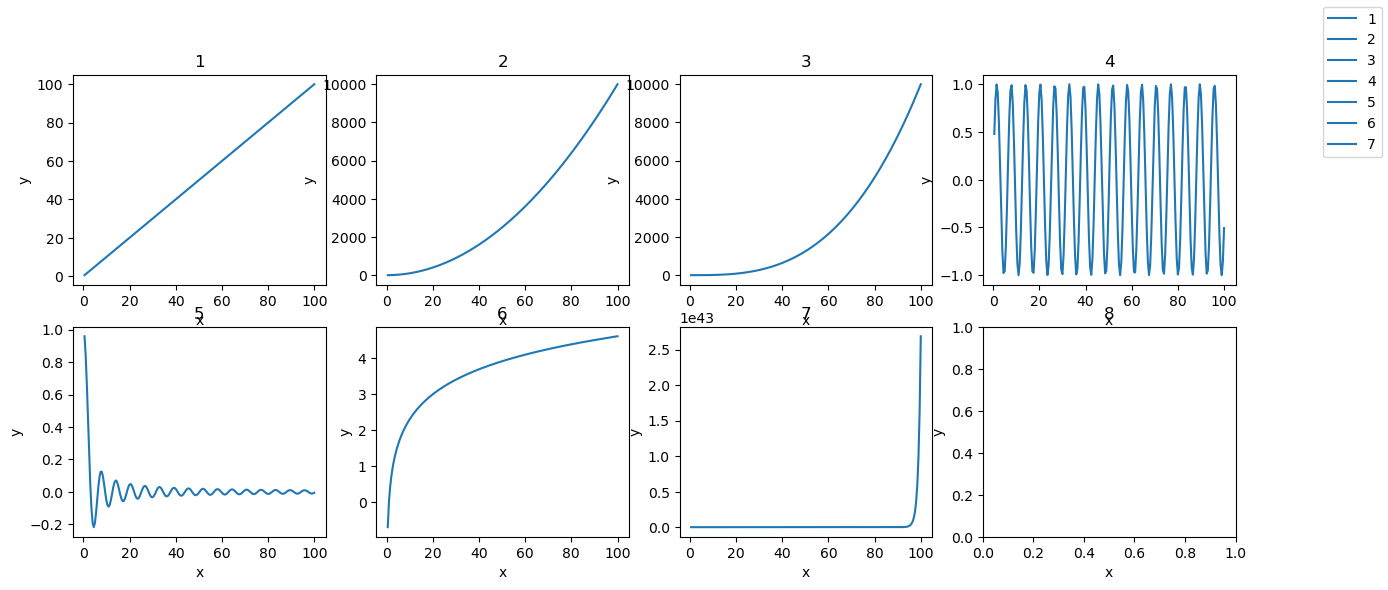

In [146]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.5,100.5,0.5)
y1 = x
y2 = x**2
y3 = (x**3)/100
y4 = np.sin(x)
y5 = (np.sin(x))/x
y6 = np.log(x)
y7 = np.exp(x)

fig, figures = plt.subplots(2,4,figsize=(15,6)) 

figures[0][0].plot(x,y1,label="1")
figures[0][1].plot(x,y2,label="2")
figures[0][2].plot(x,y3,label="3")
figures[0][3].plot(x,y4,label="4")
figures[1][0].plot(x,y5,label="5")
figures[1][1].plot(x,y6,label="6")
figures[1][2].plot(x,y7,label="7")

count = 1

for i in range(2):
    for j in range(4):
        figures[i][j].set_xlabel("x")
        figures[i][j].set_ylabel("y")
        figures[i][j].set_title(count)
        count += 1
fig.legend()
plt.show()

Q10

In [172]:
import pandas as pd
import numpy as np
np.random.seed(100)
np_array_1 = np.random.uniform(1,2,(20,5))
# print(np_array_1)
df = pd.DataFrame(np_array_1, columns = ["a","b","c","d","e"])
# print(df)
print("column with the highest standard deviation: {}".format(df.std(axis=0).idxmax()))
print("row with lowest mean: {}".format(df.mean(axis=1).idxmin()))

column with the highest standard deviation: d
row with lowest mean: 11


Q11

In [190]:
df["f"] = df["a"]+df["b"]+df["c"]+df["d"]+df["e"]
print(df["f"])
df["g"] = df["g"].astype(str)
count = 0
print(df)
for element in df["f"]:
    if(element<8):
        df.loc[count, "g"] = "LT8"
    else:
        df.loc[count, "g"] = "GT8"
    count += 1

std_lt8 = df.loc[df["g"]=="LT8",'f'].std()
std_gt8 = df.loc[df["g"]=="GT8",'f'].std()


print(std_lt8)
print(std_gt8)

0     7.095787
1     7.329971
2     6.613927
3     8.052546
4     7.700906
5     6.441864
6     6.726215
7     8.398722
8     7.184972
9     7.702786
10    8.173022
11    6.306259
12    7.675441
13    7.503976
14    7.620531
15    7.225213
16    7.512388
17    7.842499
18    6.717606
19    7.412047
Name: f, dtype: float64
           a         b         c         d         e         f    g
0   1.543405  1.278369  1.424518  1.844776  1.004719  7.095787  LT8
1   1.121569  1.670749  1.825853  1.136707  1.575093  7.329971  LT8
2   1.891322  1.209202  1.185328  1.108377  1.219697  6.613927  LT8
3   1.978624  1.811683  1.171941  1.816225  1.274074  8.052546  GT8
4   1.431704  1.940030  1.817649  1.336112  1.175410  7.700906  LT8
5   1.372832  1.005689  1.252426  1.795663  1.015255  6.441864  LT8
6   1.598843  1.603805  1.105148  1.381943  1.036476  6.726215  LT8
7   1.890412  1.980921  1.059942  1.890546  1.576901  8.398722  GT8
8   1.742480  1.630184  1.581842  1.020439  1.210027  7.184972  

Q12

In [191]:
array_2d = np.array([[1, 2, 3], [4, 5, 6]])
array_1d_broadcasted = np.array([10, 20, 30])

# Broadcasting: Adding the 1D array to each row of the 2D array
result_2d = array_2d + array_1d_broadcasted

print("Original 2D Array:")
print(array_2d)
print("Broadcasted 1D Array:")
print(array_1d_broadcasted)
print("Result after Broadcasting (2D):")
print(result_2d)


Original 2D Array:
[[1 2 3]
 [4 5 6]]
Broadcasted 1D Array:
[10 20 30]
Result after Broadcasting (2D):
[[11 22 33]
 [14 25 36]]


Q13

In [213]:
# np.random.seed(100)
def manual_argmin(np_array:np.ndarray):
    min = np_array[0]
    ans = 0
    for index,element in enumerate(np_array):
        if(min>element):
            ans = index
            min = element
    return ans,min

np_array = np.random.randint(1,5,10)
np_array_1 = np.random.randint(1,5,(7,10))
print(manual_argmin(np_array))
print(np_array_1.argmin())
print(np_array)

(5, 1)
5
[3 3 2 3 3 1 3 4 4 3]
